In [3]:
# utility libs: computations, nice plots

import numpy                   as np
import requests
import matplotlib              as mpl
import matplotlib.pyplot       as plt
import matplotlib.pyplot       as plb
from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   matplotlib.colors       import to_hex

# sci-kit learn
shut_up = '''
from   sklearn                 import datasets
from   sklearn.manifold        import Isomap
from   sklearn.cluster         import KMeans
from   sklearn.neighbors       import KNeighborsClassifier
from   sklearn.metrics         import confusion_matrix, accuracy_score
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model    import LogisticRegression
'''

In [12]:
# Use LaTeX, set matplotlib plots resolution to decent

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"]
})

%matplotlib inline 
plt.rcParams['figure.dpi'] = 300

In [4]:
# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str', unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names = np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])

In [32]:
print(data.shape)
print(names)

print(data[9])


(15, 7803)
['GRB_name' 'GRB_name_Fermi' 'T0' 'ra' 'decl' 'pos_error' 'T90'
 'T90_error' 'T90_start' 'fluence' 'fluence_error' 'redshift' "'T100'"
 'GBM_located' 'mjd_(T0)']
['1.9542e-06' '6.3738e-06' '-999' ... '2.4858e-08' '1.6510e-07'
 '2.6055e-06']


In [42]:
# Put variables in arrays with immediately understandable names
string_999  = np.full(len(data[0]), fill_value='-999')
# marie_kondo = np.where( data[9] != string_999) and (data[6] != string_999) )

t90  = np.asfarray( data[6 , marie_kondo] ) #, dtype=np.float64)
et90 = np.asfarray( data[7 , marie_kondo] ) #, dtype=np.float64)
f    = np.asfarray( data[9 , marie_kondo] ) #, dtype=np.float64)
ef   = np.asfarray( data[10, marie_kondo] ) #, dtype=np.float64) 
z    = np.asfarray( data[11, marie_kondo] ) #, dtype=np.float64) 

NameError: name 'marie_kondo' is not defined

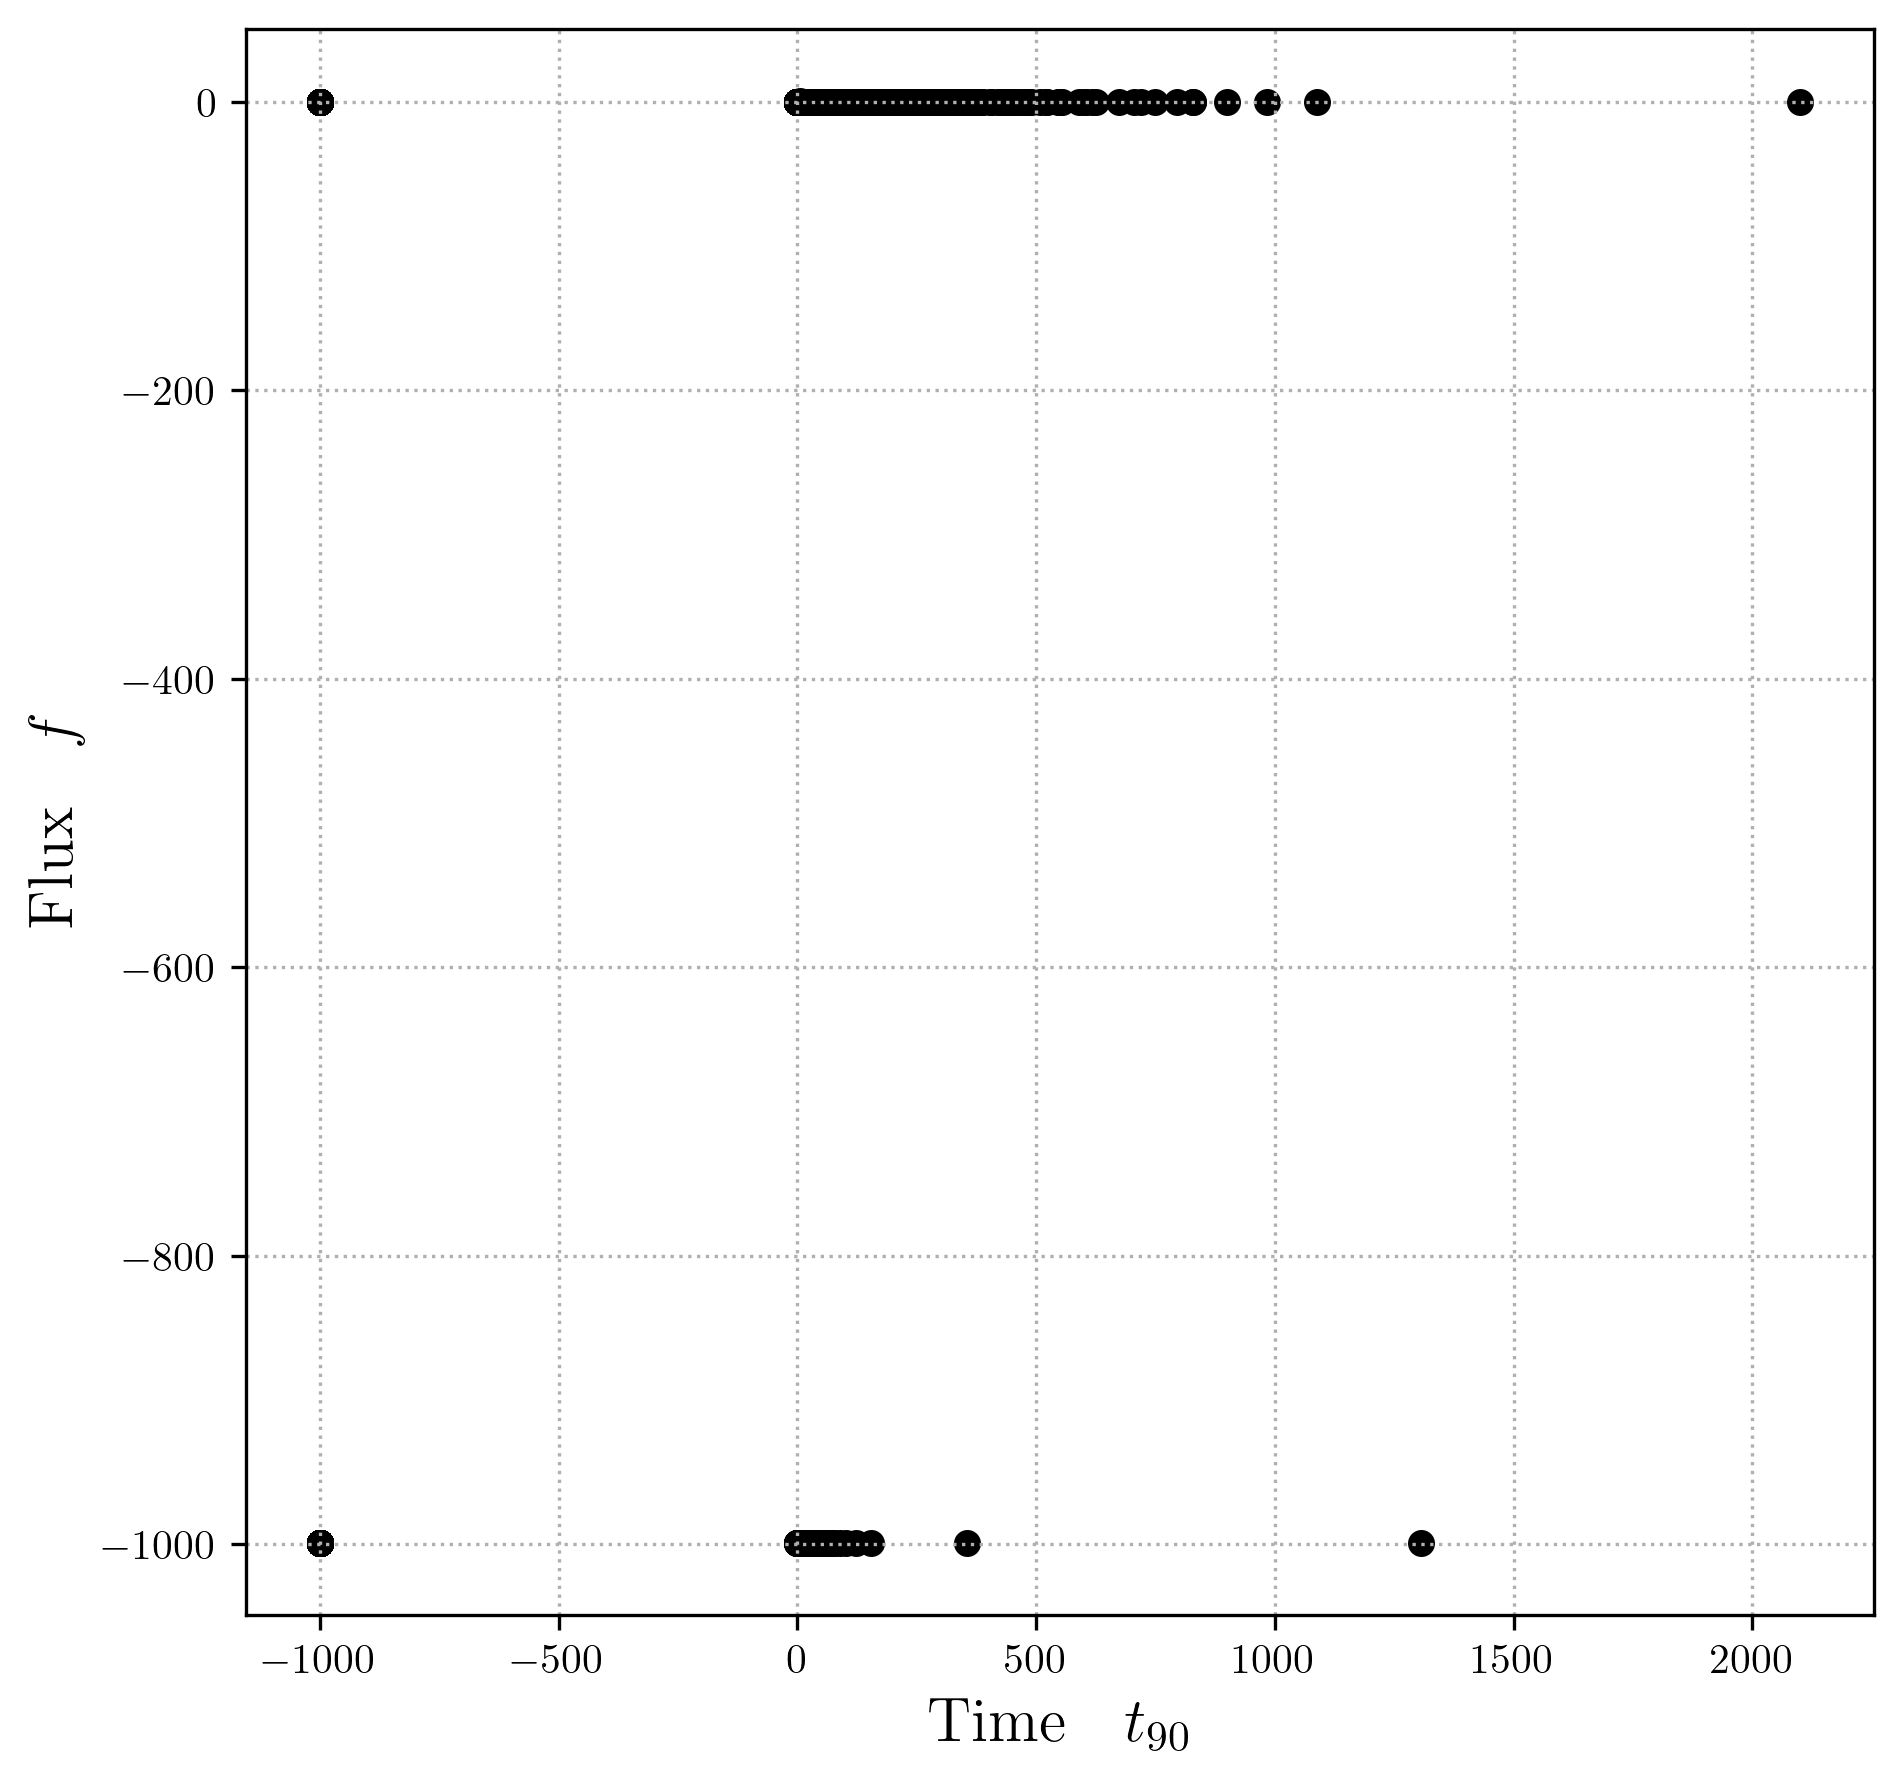

In [43]:
fig , ax = plt.subplots(figsize=(7,7))

# ax.set_xlim()
# ax.set_ylim()
ax.grid(ls=':')
# ax.set_title('Some title' + '\n', fontsize=15)
ax.set_xlabel(r'Time \; $t_{90}$', fontsize=15)
ax.set_ylabel(r'Flux \; $f$', fontsize=15)   # , rotation='horizontal', labelpad=20



ax.scatter(t90, f, color='black', s=30, marker='o') # , label='')